In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/Sankalpmahapatra10/Practice_Projects/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
#finding number of rows and columns
data.shape

(1470, 35)

In [7]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean and standard deviation is appears to be not good enough in most of the features.Here the standard deviation is not much less than the mean. 

2.Also the difference between all the quantiles for all the features is not very big

3.As the count is found out to be 1470 here which is matching the number of rows so we can say that there is no null values(NANs) present in the dataset.

4.There are 1470 rows and 35 columns present in the dataset.

5.Minimum vaule for some of the featurs is found out to be zero. lets dive further into the dataset to find more about the  type of distribution.

In [8]:
#finding the null values in each column
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We have crossed checked for the null values and we found out zero NANS in the dataset.

In [9]:
#no. of columns in the dataset
data.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

there are many features having object datatype are present int he dataset. we need to encode them into integer values if possible or we can delete them if they are not related.

In [11]:
data.Attrition.value_counts()                 

No     1233
Yes     237
Name: Attrition, dtype: int64

In [82]:
data.Gender.value_counts()  

1    882
0    588
Name: Gender, dtype: int64

In [81]:
data.Education.value_counts()  

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

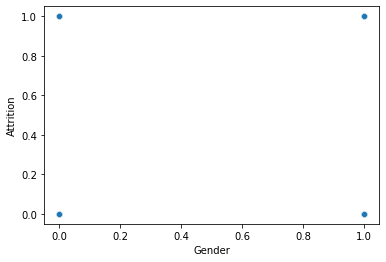

In [83]:
sns.scatterplot(y="Attrition", x="Gender", data=data, palette = 'pink')

we can observe from the value counts that the dataset is not imbalanced and we are good to proceed

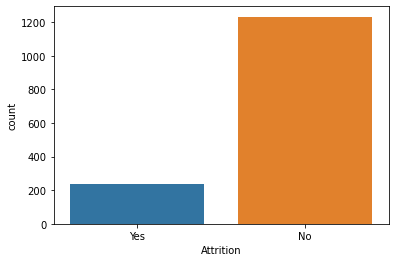

In [12]:
#lets plot the value counts for attrition 
sns.countplot(x='Attrition', data=data)
plt.show()

# Encoding columns having object data types

In [20]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [22]:
#encoding the object datatypes columns
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [23]:
#encoding the BusinessTravel column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['BusinessTravel'])
pd.Series(df)

data['BusinessTravel']=df
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [24]:
#encoding the Department column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['Department'])
pd.Series(df)

data['Department']=df


In [25]:
#encoding the EducationField column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['EducationField'])
pd.Series(df)

data['EducationField']=df


In [27]:
#encoding the Gender column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['Gender'])
pd.Series(df)

data['Gender']=df


In [28]:
#encoding the JobRole column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['JobRole'])
pd.Series(df)

data['JobRole']=df


In [29]:
#encoding the MaritalStatus column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['MaritalStatus'])
pd.Series(df)

data['MaritalStatus']=df

In [32]:
#encoding the Over18  column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['Over18'])
pd.Series(df)

data['Over18']=df

In [33]:
#encoding the OverTime column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

df=lab_enc.fit_transform(data['OverTime'])
pd.Series(df)

data['OverTime']=df

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

now as all the columns having object datatypes are encoded so now we can proceed with SelectKBest feature selection method.

As we know that there are 35 columns in the dataset and all of them may not be relevent in our analysis, so lets reduce the number of columns using SelectKBest feature selection technique.

# SelectKBest feature selection method

In [35]:
from sklearn.feature_selection import SelectKBest, f_classif

In [36]:
y=data.Attrition
x=data.drop(columns=['Attrition'])

In [39]:
best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(x,y)
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(x.columns)

#concatinating dataframes
feature_scores=pd.concat([data_columns,data_scores],axis=1)
feature_scores.columns=['Feature_name','Scores']
print(feature_scores.nlargest(16, 'Scores'))

               Feature_name     Scores
21                 OverTime  94.656457
27        TotalWorkingYears  44.252491
13                 JobLevel  43.215344
16            MaritalStatus  39.599763
31       YearsInCurrentRole  38.838303
17            MonthlyIncome  38.488819
0                       Age  38.175887
33     YearsWithCurrManager  36.712311
26         StockOptionLevel  28.140501
30           YearsAtCompany  27.001624
12           JobInvolvement  25.241985
15          JobSatisfaction  15.890004
9   EnvironmentSatisfaction  15.855209
4          DistanceFromHome   8.968277
14                  JobRole   6.649672
3                Department   6.035877


lets build a new dtaframe to store all the best 16 features

In [41]:
new_data=data[['OverTime','TotalWorkingYears','JobLevel','MaritalStatus','YearsInCurrentRole','MonthlyIncome','Age','YearsWithCurrManager','StockOptionLevel','YearsAtCompany','JobInvolvement','JobSatisfaction','EnvironmentSatisfaction','DistanceFromHome','JobRole','Department','Attrition']]

In [42]:
new_data

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


# Visualization

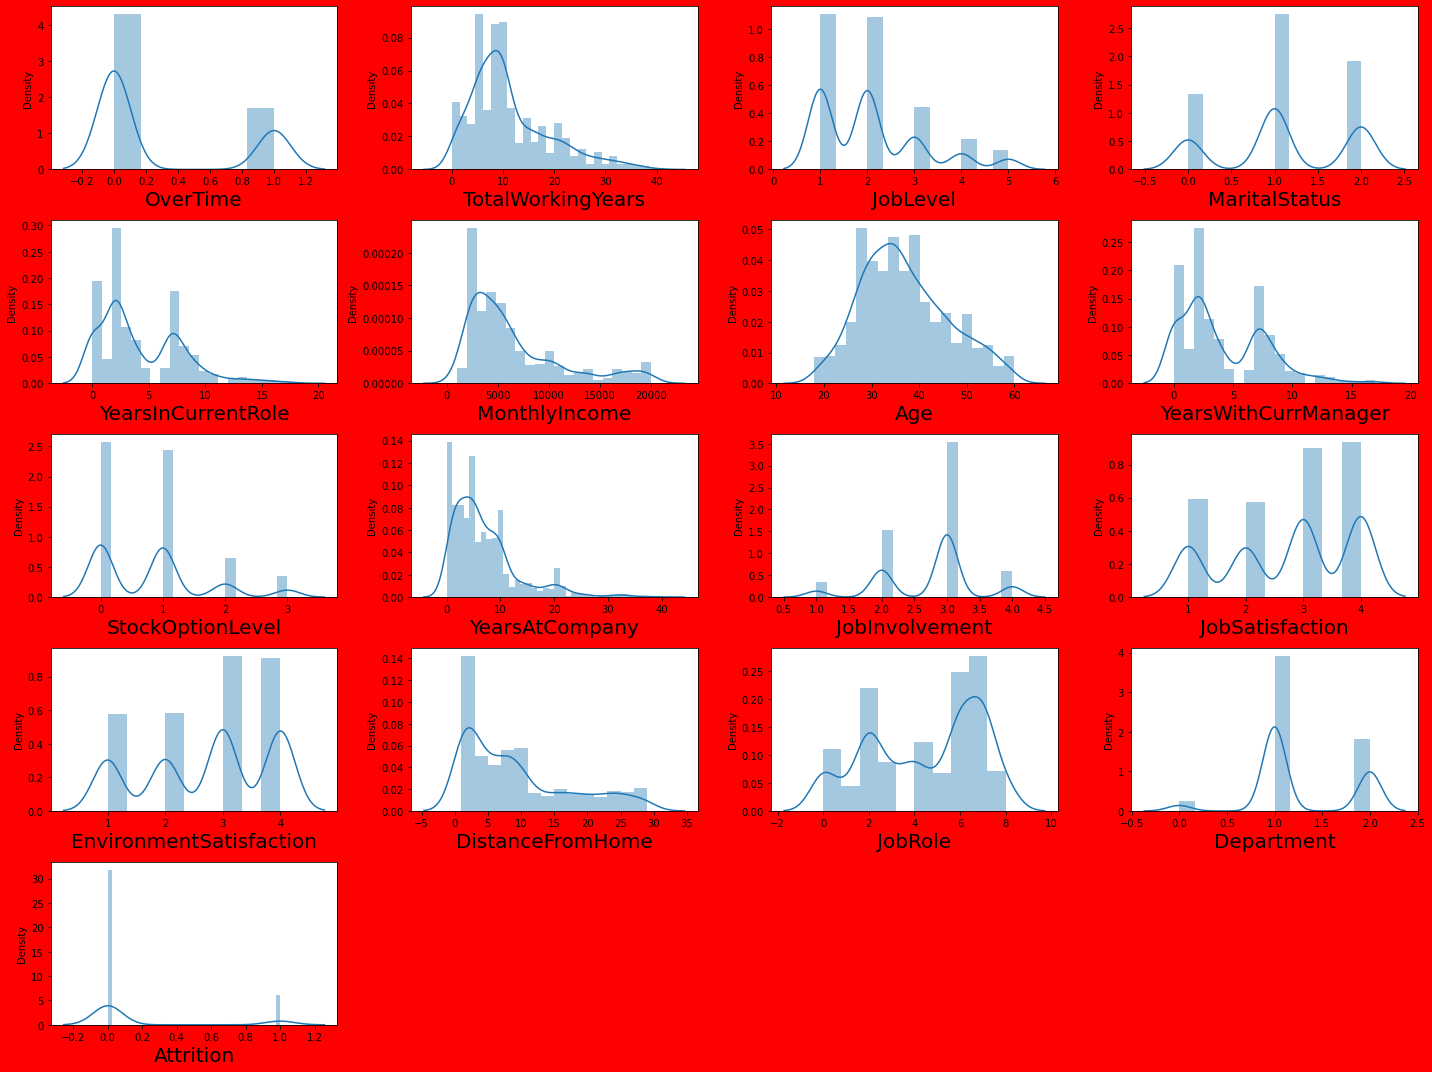

In [43]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in new_data:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the distplot

The data distribution does not look decent enough for most of the features i.e. it does not shows normal distribution for most of the features(the curve is not bell shaped) except some features like TotalWorkingyears and age where we observed a decent normal distribution. now lets find out if there is actual skewness in some features i.e. whether they have outliers by plotting box plots. 


In [44]:
df_features=new_data.drop('Attrition', axis=1)

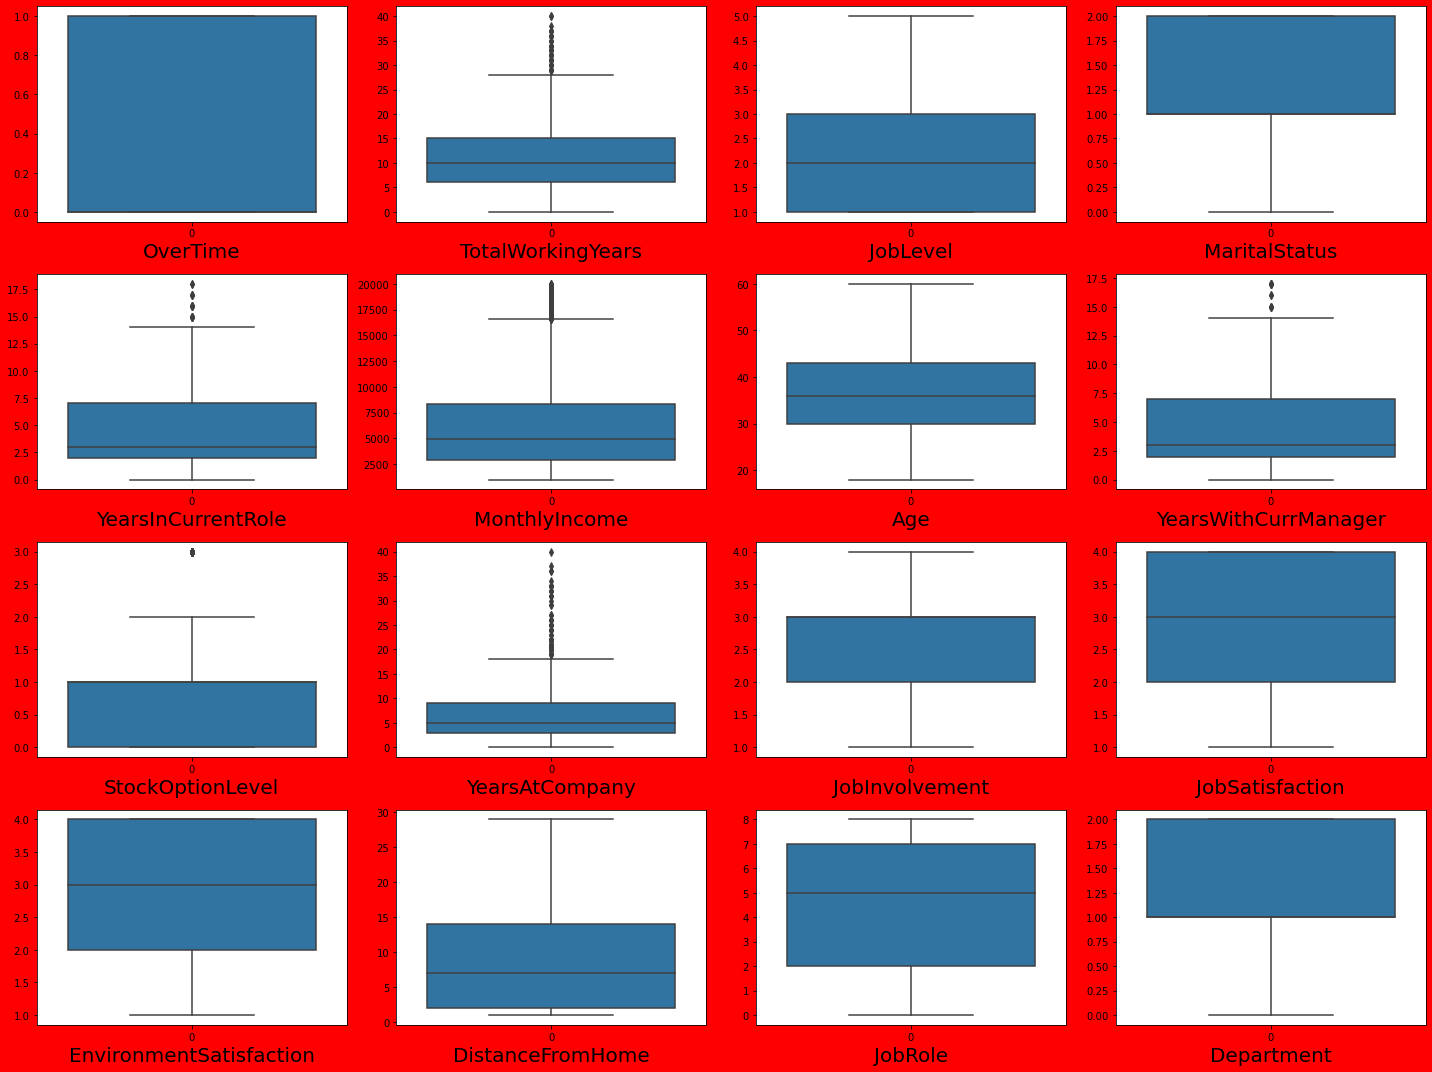

In [45]:
#Now lets find the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=16:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observation from the boxplot

features like Total working years ,yearsincurrentRole, monthlyIncome, yearsWithCurrentManager, stockOptionlevel and YearsatCompany have outliers.

now lets remove the outliers.

In [47]:
new_data.shape

(1470, 17)

In [51]:
df=new_data

In [53]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

OverTime                      1.0
TotalWorkingYears             9.0
JobLevel                      2.0
MaritalStatus                 1.0
YearsInCurrentRole            5.0
MonthlyIncome              5468.0
Age                          13.0
YearsWithCurrManager          5.0
StockOptionLevel              1.0
YearsAtCompany                6.0
JobInvolvement                1.0
JobSatisfaction               2.0
EnvironmentSatisfaction       2.0
DistanceFromHome             12.0
JobRole                       5.0
Department                    1.0
Attrition                     0.0
dtype: float64

In [54]:
df.head(2)

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0


In [55]:
#removing the outliers for TotalWorkingYears
twy_high=q3.TotalWorkingYears + (1.5 * iqr.TotalWorkingYears)


index=np.where(df['TotalWorkingYears'] > twy_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1407, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1403,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1404,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1405,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


In [56]:
#removing the outliers for YearsInCurrentRole
yicr_high=q3.YearsInCurrentRole + (1.5 * iqr.YearsInCurrentRole)


index=np.where(df['YearsInCurrentRole'] > yicr_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1390, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1386,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1387,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1388,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


In [57]:
#removing the outliers for MonthlyIncome
mi_high=q3.MonthlyIncome + (1.5 * iqr.MonthlyIncome)


index=np.where(df['MonthlyIncome'] > mi_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1319, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1315,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1316,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1317,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


In [58]:
#removing the outliers for YearsWithCurrManager
ywcm_high=q3.YearsWithCurrManager + (1.5 * iqr.YearsWithCurrManager)


index=np.where(df['YearsWithCurrManager'] > ywcm_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1311, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1307,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1308,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1309,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


In [59]:
#removing the outliers for StockOptionLevel
sol_high=q3.StockOptionLevel + (1.5 * iqr.StockOptionLevel)


index=np.where(df['StockOptionLevel'] > sol_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1231, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1227,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1228,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1229,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


In [60]:
#removing the outliers for YearsAtCompany
yac_high=q3.YearsAtCompany + (1.5 * iqr.YearsAtCompany)


index=np.where(df['YearsAtCompany'] > yac_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(1200, 17)


,index,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
0,0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2,1
1,1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1,0
2,2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1,1
3,3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1,0
4,4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1196,1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1197,1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1198,1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0


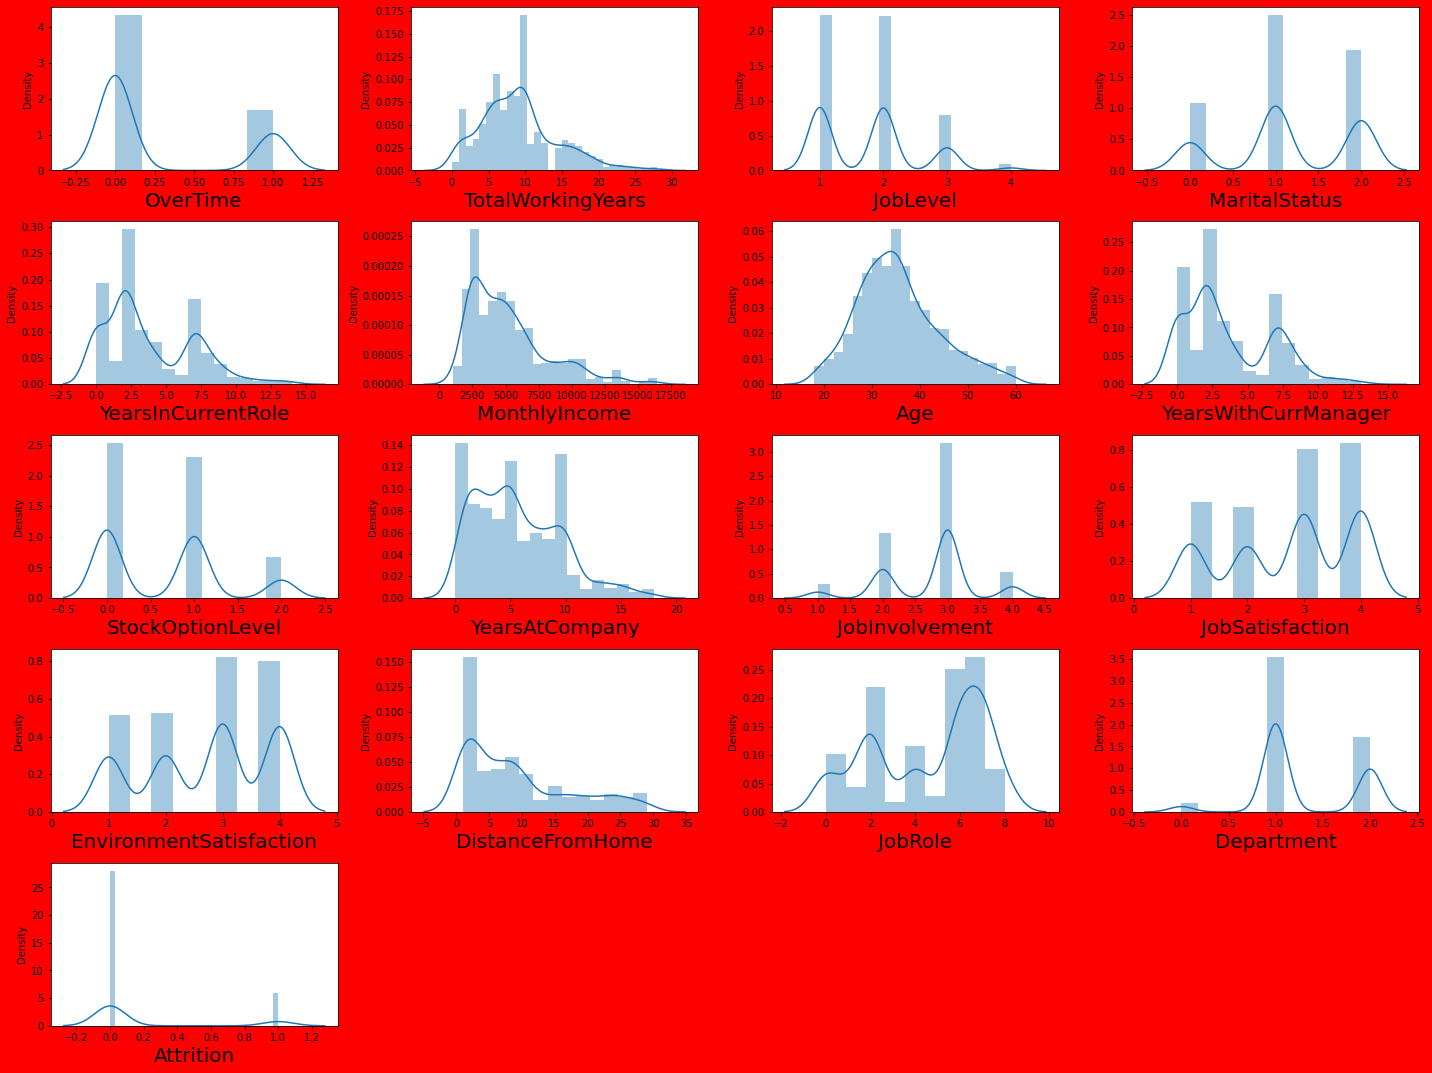

In [61]:
#now lets check if the outliers are removed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

the graph looks little bit better than before, now lets plot some more plots

In [62]:
new_data=df

In [63]:
new_data.shape

(1200, 17)

now lets find out the relation between the features and the labels

In [64]:
# relation between the features and labels

y=new_data['Attrition']
x=new_data.drop(columns=['Attrition'])

In [65]:
x

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department
0,1,8,2,2,4,5993,41,5,0,6,3,4,2,1,7,2
1,0,10,2,1,7,5130,49,7,1,10,2,2,3,8,6,1
2,1,7,1,2,0,2090,37,0,0,0,2,3,4,2,2,1
3,1,8,1,1,7,2909,33,0,0,8,3,3,4,3,6,1
4,0,6,1,1,2,3468,27,2,1,2,3,2,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1
1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1
1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1
1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2


In [66]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1200, dtype: int64

In [69]:
#finding the corelation between the features in the data set
new_data.corr()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
OverTime,1.000000,0.013214,0.009088,-0.017795,-0.022977,0.014227,0.010098,-0.039904,-0.030918,-0.032874,-0.005330,0.033597,0.070151,0.032638,0.032010,0.017185,0.256063
TotalWorkingYears,0.013214,1.000000,0.616352,-0.077484,0.437686,0.595002,0.567219,0.411616,0.062968,0.496025,0.001232,-0.009007,-0.041236,0.061724,-0.111728,0.028897,-0.180310
JobLevel,0.009088,0.616352,1.000000,-0.076132,0.352632,0.893585,0.341832,0.307806,0.080604,0.386222,-0.008376,0.008910,-0.017190,0.079021,-0.017451,0.237897,-0.168932
MaritalStatus,-0.017795,-0.077484,-0.076132,1.000000,-0.040633,-0.078940,-0.106391,-0.026832,-0.702893,-0.042516,-0.052901,0.022821,-0.030796,-0.041257,0.054596,0.039045,0.174285
YearsInCurrentRole,-0.022977,0.437686,0.352632,-0.040633,1.000000,0.320646,0.125383,0.731906,0.081839,0.861530,0.031625,0.030161,0.048291,0.024244,0.019578,0.087691,-0.169966
MonthlyIncome,0.014227,0.595002,0.893585,-0.078940,0.320646,1.000000,0.325473,0.267395,0.062504,0.350435,-0.022064,0.004831,-0.040850,0.050371,-0.024503,0.176698,-0.155886
Age,0.010098,0.567219,0.341832,-0.106391,0.125383,0.325473,1.000000,0.105897,0.079688,0.144335,0.022352,0.007210,-0.004850,0.026408,-0.099809,-0.009059,-0.156842
YearsWithCurrManager,-0.039904,0.411616,0.307806,-0.026832,0.731906,0.267395,0.105897,1.000000,0.075544,0.843951,0.055963,0.011468,0.016370,0.009756,0.003200,0.051808,-0.164537
StockOptionLevel,-0.030918,0.062968,0.080604,-0.702893,0.081839,0.062504,0.079688,0.075544,1.000000,0.080870,0.059883,0.020081,0.036137,0.079135,0.002432,0.020642,-0.204573
YearsAtCompany,-0.032874,0.496025,0.386222,-0.042516,0.861530,0.350435,0.144335,0.843951,0.080870,1.000000,0.031271,0.043087,0.028086,0.018618,-0.001919,0.073573,-0.180059


In [70]:
#sortinh the correlation values in assending order for the label(W)
new_data.corr()['Attrition'].sort_values()

StockOptionLevel          -0.204573
TotalWorkingYears         -0.180310
YearsAtCompany            -0.180059
YearsInCurrentRole        -0.169966
JobLevel                  -0.168932
YearsWithCurrManager      -0.164537
Age                       -0.156842
MonthlyIncome             -0.155886
JobInvolvement            -0.143832
JobSatisfaction           -0.113151
EnvironmentSatisfaction   -0.091122
JobRole                    0.052924
Department                 0.059305
DistanceFromHome           0.084045
MaritalStatus              0.174285
OverTime                   0.256063
Attrition                  1.000000
Name: Attrition, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

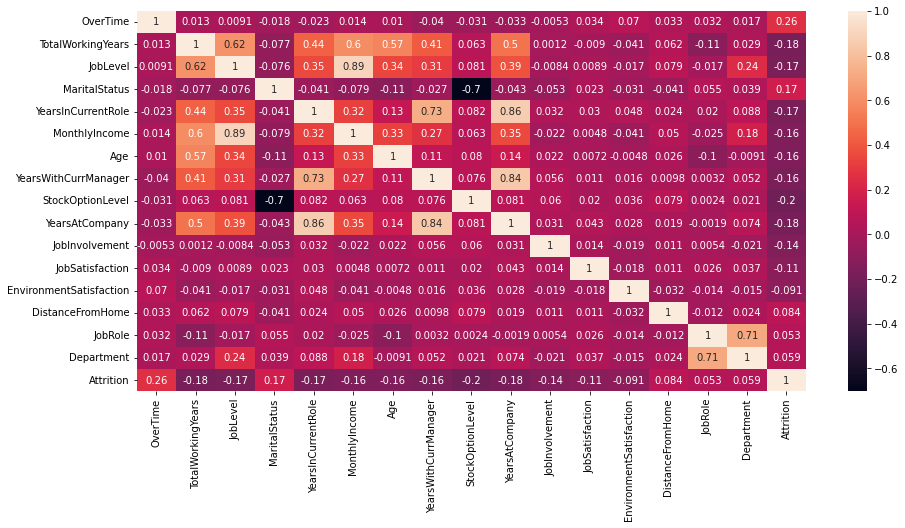

In [72]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(new_data.corr(),annot=True)

observations from the heatmap plot

1.all the features have weak correlation with the label(Attritrion).

2.some  of the features have strong correaltion among each other. 

3.most of the features have multi-colinearity. we will use VIF to find more about multi-colinearity.

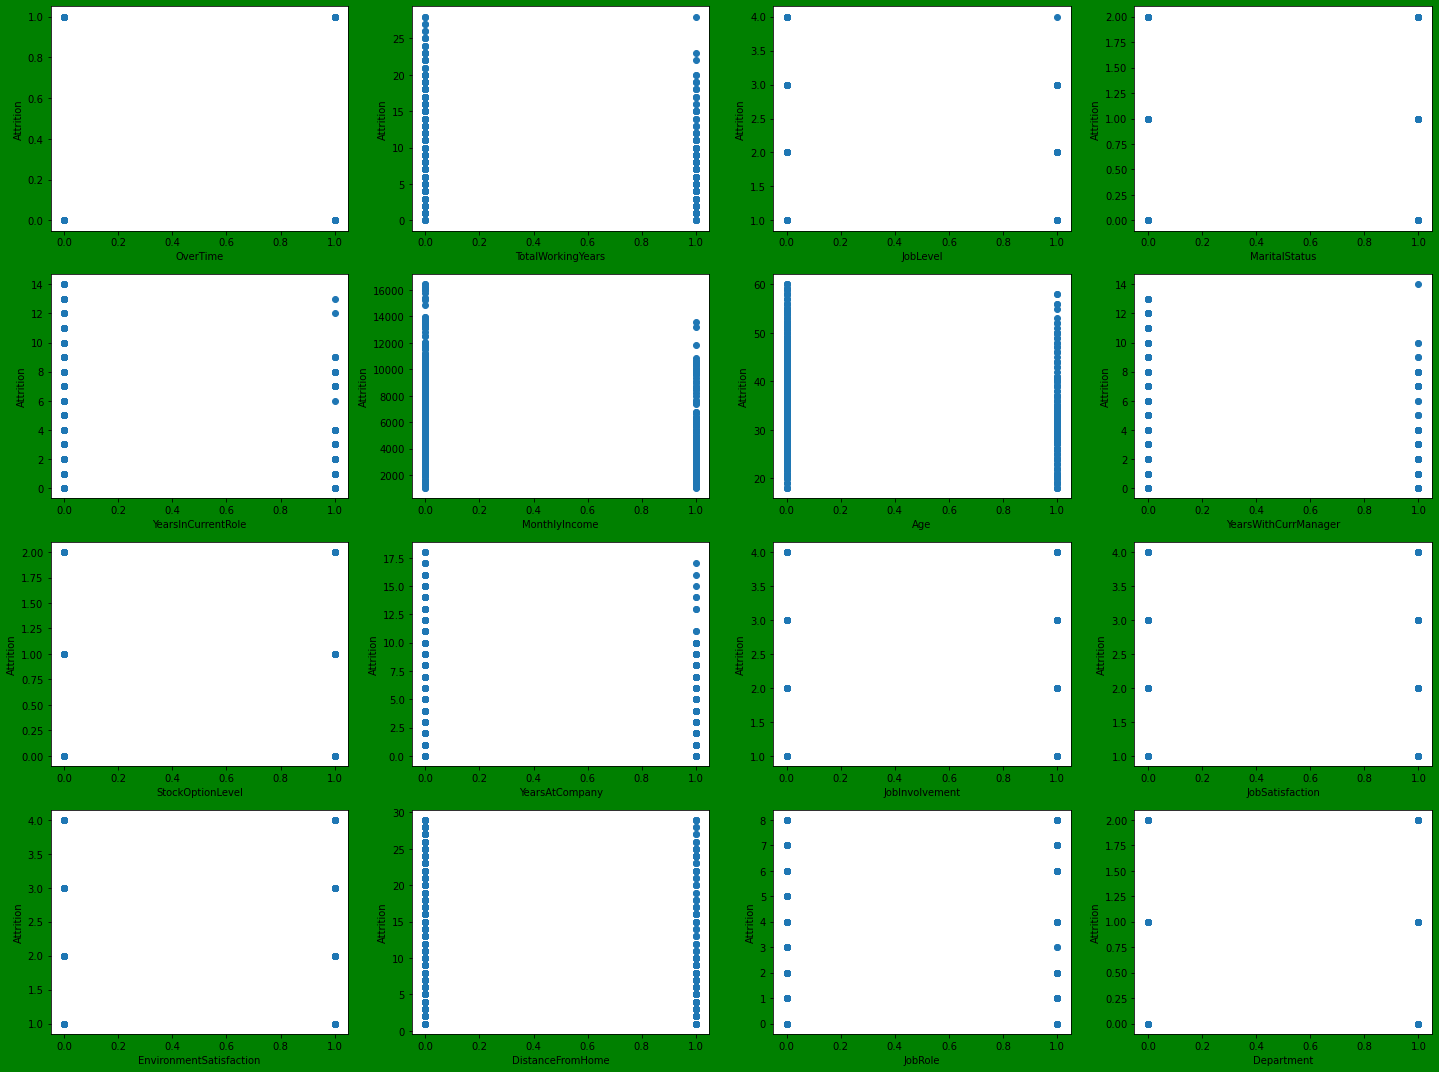

In [76]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Attrition',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [77]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

Now as the label or the target variable is not a continuous data so this is a classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

In [78]:
x_scaled.shape[1]

16

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [79]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns


vif

,VIF,Features
0,1.017031,OverTime
1,2.592559,TotalWorkingYears
2,5.757232,JobLevel
3,2.022752,MaritalStatus
4,3.910859,YearsInCurrentRole
5,5.150425,MonthlyIncome
6,1.548685,Age
7,3.521561,YearsWithCurrManager
8,2.029498,StockOptionLevel
9,6.649227,YearsAtCompany


Observations after finding the  variance inflation factor 

features like JobLevel , MonthlyIncome and YearsAtCompany are highly multi-collinear with other features as they have a VIF score greater than 5.

Rest all the features have a VIF score between 1 and 5 so they are moderately multi colinear. 



# Building classification models for predicting the Attritrion

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Logistic regression

In [141]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


684     0
77      0
468     0
1469    0
942     0
Name: Attrition, dtype: int64

In [142]:
lr = LogisticRegression(max_iter = 100)
lr.fit(x_train,y_train)


LogisticRegression()

In [143]:
new_data.tail()

,OverTime,TotalWorkingYears,JobLevel,MaritalStatus,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany,JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,DistanceFromHome,JobRole,Department,Attrition
1465,0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1,0
1466,0,9,3,1,7,9991,39,7,1,7,2,1,4,6,0,1,0
1467,1,6,2,1,2,6142,27,3,1,6,4,2,2,4,4,1,0
1468,0,17,2,1,6,5390,49,8,0,9,2,2,4,2,7,2,0
1469,0,6,2,1,3,4404,34,2,0,4,4,3,2,8,2,1,0


In [144]:
#prediction of region 
print('Attrition value is ', lr.predict(scalar.transform([[0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1]])))

Attrition value is  [0]


In [145]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [146]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.87

In [147]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[244,   6],
       [ 33,  17]], dtype=int64)

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       250
           1       0.74      0.34      0.47        50

    accuracy                           0.87       300
   macro avg       0.81      0.66      0.70       300
weighted avg       0.86      0.87      0.85       300



# knn classifier model

In [97]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

230     0
1003    0
210     1
610     0
1380    0
Name: Attrition, dtype: int64

In [98]:
#Training the model

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)




KNeighborsClassifier()

In [99]:
#prediction of region 
print('Attrition value is ', knn.predict(scalar.transform([[0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1]])))

Attrition value is  [0]


In [100]:
y_pred=knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [101]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.85

In [102]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[242,   7],
       [ 38,  13]], dtype=int64)

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       249
           1       0.65      0.25      0.37        51

    accuracy                           0.85       300
   macro avg       0.76      0.61      0.64       300
weighted avg       0.83      0.85      0.82       300



# RandomForestClassifier model

In [104]:
#splitting the datset into test and train
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=355)
y_train.head()

230     0
1003    0
210     1
610     0
1380    0
Name: Attrition, dtype: int64

In [105]:
#Training the model

rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)




RandomForestClassifier()

In [106]:
#prediction of region 
print('Attrition value is ', rfc.predict(scalar.transform([[0,17,2,1,2,2571,36,3,1,5,4,4,3,23,2,1]])))

Attrition value is  [0]


In [107]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], d

In [108]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8633333333333333

In [109]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[242,   7],
       [ 34,  17]], dtype=int64)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       249
           1       0.71      0.33      0.45        51

    accuracy                           0.86       300
   macro avg       0.79      0.65      0.69       300
weighted avg       0.85      0.86      0.84       300



I have chosen the random forest classifier model as the best model because it has the highest accuracy. lets see if we can improve the accuracy after using cross validation and hyperparameter tuning.

# Cross Validation

In [149]:
#cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.84166667, 0.83333333, 0.84166667, 0.86666667, 0.85      ,
       0.84166667, 0.80833333, 0.84166667, 0.875     , 0.83333333])

In [154]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8366666666666667

# Hyperparameter tuning using GridSearchCV

In [155]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[2,4,6,8,14,17]}

In [156]:
gridsearch=GridSearchCV(estimator= rfc , param_grid=param_grid )

In [157]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [2, 4, 6, 8, 14, 17]})

In [158]:
gridsearch.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 17}

In [160]:
rfc=RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,n_estimators=17)

In [161]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2, n_estimators=17)

In [162]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

In [163]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.86

In [164]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[242,   8],
       [ 34,  16]], dtype=int64)

In [165]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       250
           1       0.67      0.32      0.43        50

    accuracy                           0.86       300
   macro avg       0.77      0.64      0.68       300
weighted avg       0.84      0.86      0.84       300



the hyperparameter tuning by using gridsearchCV has not increased the accuracy of the random forest classifier model. The accuracy remains the same.

In [168]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle2'
pickle.dump(knn,open('finalized_model.pickle2','wb'))